## Introduction to Deep Learning

So, we have arrived at the phase where we might ask the question: "What is deep learning?"
While there might have questions boiling over in your mind over why are we discussing math with computer science and some of oyu may have the courage to ask this (Kudos to you!) here's something for everyone:


![alt text](https://i.pinimg.com/originals/02/c0/ad/02c0adabbe0490c325078a5128e79b19.jpg)

Dr. Feynman was right. You need to know math to know machine learning or deep learning. But let's discuss deep learning in a little bit simpler terms.
From the situation I talked about, we can picturize this as:

![alt text](https://cdn-images-1.medium.com/max/1163/1*X_CJvgYFbcqimKhMfK-ydw.jpeg)

Neural Networks can thus be defined as a system of simple,processing elements which process their information by their response to external inputs


We will be working with `sklearn` for a basic neural network. You can work with `caffe`,`TensorFlow` or `PyTorch` also.

A neural network is often thought to be resembled to the neurons in a brain. The networks contain nodes which act in 'feed forward' state; that means information will always go in a forward direction. A single node may be connected to multiple nodes both in the backward and forward direction. To each of this connections, the neuron would assign a number. when the network is activated, the neuron recieves another number which it multiplies with the earlier number (weight). The sum of the products of each connections have to pass through a certain threshold value. If it exceeds, the neuron sends the number forward and if not, it sends a zero that means, no data to the next layer.

In [1]:
# Import neccessary packages
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
# Default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10.0,8.0)

`sklearn` or Scikit-learn is one of the most basic libraries used in machine learning. It is highly popular due to being beginner-friendly and having datasets already included in the library 

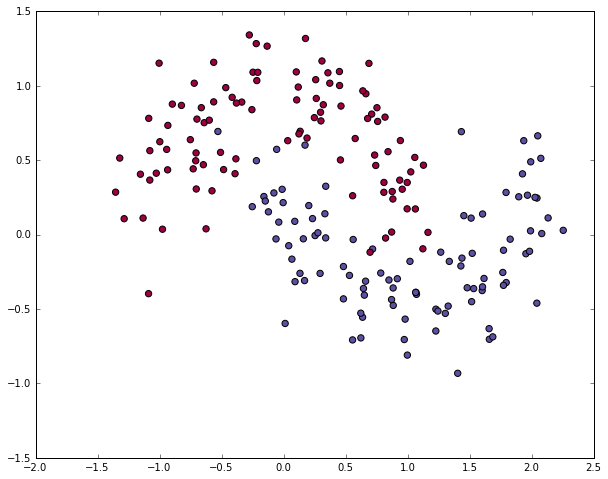

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X,y=sklearn.datasets.make_moons(200,noise=0.20)
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=plt.cm.Spectral)

From the above scatter plot, The dataset we generated has two classes, plotted as red and blue points. You can think of the blue dots as male patients and the red dots as female patients, with the x- and y- axis being medical measurements

Our goal is to train a Machine Learning classifier that predicts the correct class (male or female) given the x- and y- coordinates. Note that the data is not linearly separable, we can't draw a straight line that separates the two classes. This means that linear classifiers, such as Logistic Regression, won't be able to fit the data unless you hand-engineer non-linear features (such as polynomials) that work well for the given dataset.

In [3]:
# Helper function to plot decision boundary
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Let's now build a 3-layer neural network with one input layer, one hidden layer, and one output layer. The number of nodes in the input layer is determined by the dimensionality of our data, 2. Similarly, the number of nodes in the output layer is determined by the number of classes we have, also 2. (Because we only have 2 classes we could actually get away with only one output node predicting 0 or 1, but having 2 makes it easier to extend the network to more classes later on). The input to the network will be x- and y- coordinates and its output will be two probabilities, one for class 0 ("female") and one for class 1 ("male").


In [4]:
# Training set size
num_examples=len(X)

# Setting dimensionalities
nn_input_dim=2
nn_output_dim =2
# Gradient descent parameters
epsilon=0.01
reg_lambda=0.01

In [5]:
# Helper function to evaluate total loss on dataset
def calculate_loss(model):
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
    z1=X.dot(W1)+b1
    a1=np.tanh(z1)
    z2=a1.dot(W2)+b2
    exp_scores=np.exp(z2)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    # Calculating loss
    correct_logprobs=-np.log(probs[range(num_examples),y])
    data_loss=np.sum(correct_logprobs)
    # Add regularization term
    data_loss+=reg_lambda/2*(np.sum(np.square(W1))+np.sum(np.square(W2)))
    return 1./num_examples*data_loss

We also implement a helper function to calculate the output of the network. It does forward propagation as defined above and returns the class with the highest probability.


In [6]:
# Helper function to predict output
def predict(model,x):
    W1,b1,W2,b2=model['W1'],model['b1'],model['W2'],model['b2']
    # Forward Propagation
    z1=x.dot(W1)+b1
    a1=np.tanh(z1)
    z2=a1.dot(W2)+b2
    exp_scores=np.exp(z2)
    probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
    return np.argmax(probs,axis=1)

In [8]:
# This function learns parameters for the neural network and returns the model
def build_model(nn_hdim,num_passes=20000,print_loss=False):
    np.random.seed(0)
    W1=np.random.randn(nn_input_dim,nn_hdim)/np.sqrt(nn_input_dim)
    b1=np.zeros((1,nn_hdim))
    W2=np.random.randn(nn_hdim,nn_output_dim)/np.sqrt(nn_hdim)
    b2=np.zeros((1,nn_output_dim))
    model={}
    for i in range(0,num_passes):
    	# Forward propagation
        z1=X.dot(W1)+b1
        a1=np.tanh(z1)
        z2=a1.dot(W2)+b2
        exp_scores=np.exp(z2)
        probs=exp_scores/np.sum(exp_scores,axis=1,keepdims=True)
        # Backward propagation
        delta3=probs
        delta3[range(num_examples),y]-=1
        dW2=(a1.T).dot(delta3)
        db2=np.sum(delta3,axis=0,keepdims=True)
        delta2=delta3.dot(W2.T)*(1-np.power(a1,2))
        dW1=np.dot(X.T,delta2)
        db1=np.sum(delta2,axis=0)
        # Adding regularization 
        dW2+=reg_lambda*W2
        dW1+=reg_lambda*W1
        # Gradient descent parameter update
        W1+= -epsilon*dW1
        b1+=-epsilon*db1
        W2+=-epsilon*dW2
        b2+=-epsilon*db2
        # Assign new paramters to model
        model={'W1':W1,'b1':b1,'W2':W2,'b2':b2}
        if print_loss and i %1000 ==0:
            print("Loss after iteration %i: %f"%(i,calculate_loss(model)))
        return model

Loss after iteration 0: 0.432387


D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


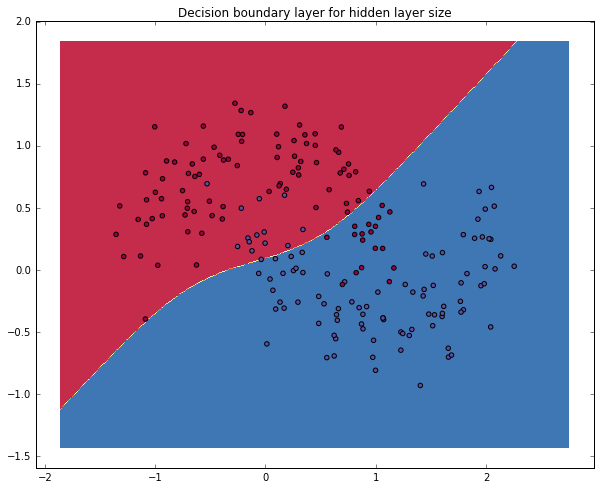

In [9]:
# Build a model with three-dimensional hidden layer           
model= build_model(3,print_loss=True)
plot_decision_boundary(lambda x:predict(model,x))
plt.title("Decision boundary layer for hidden layer size")
plt.show()

D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
D:\Anaconda\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


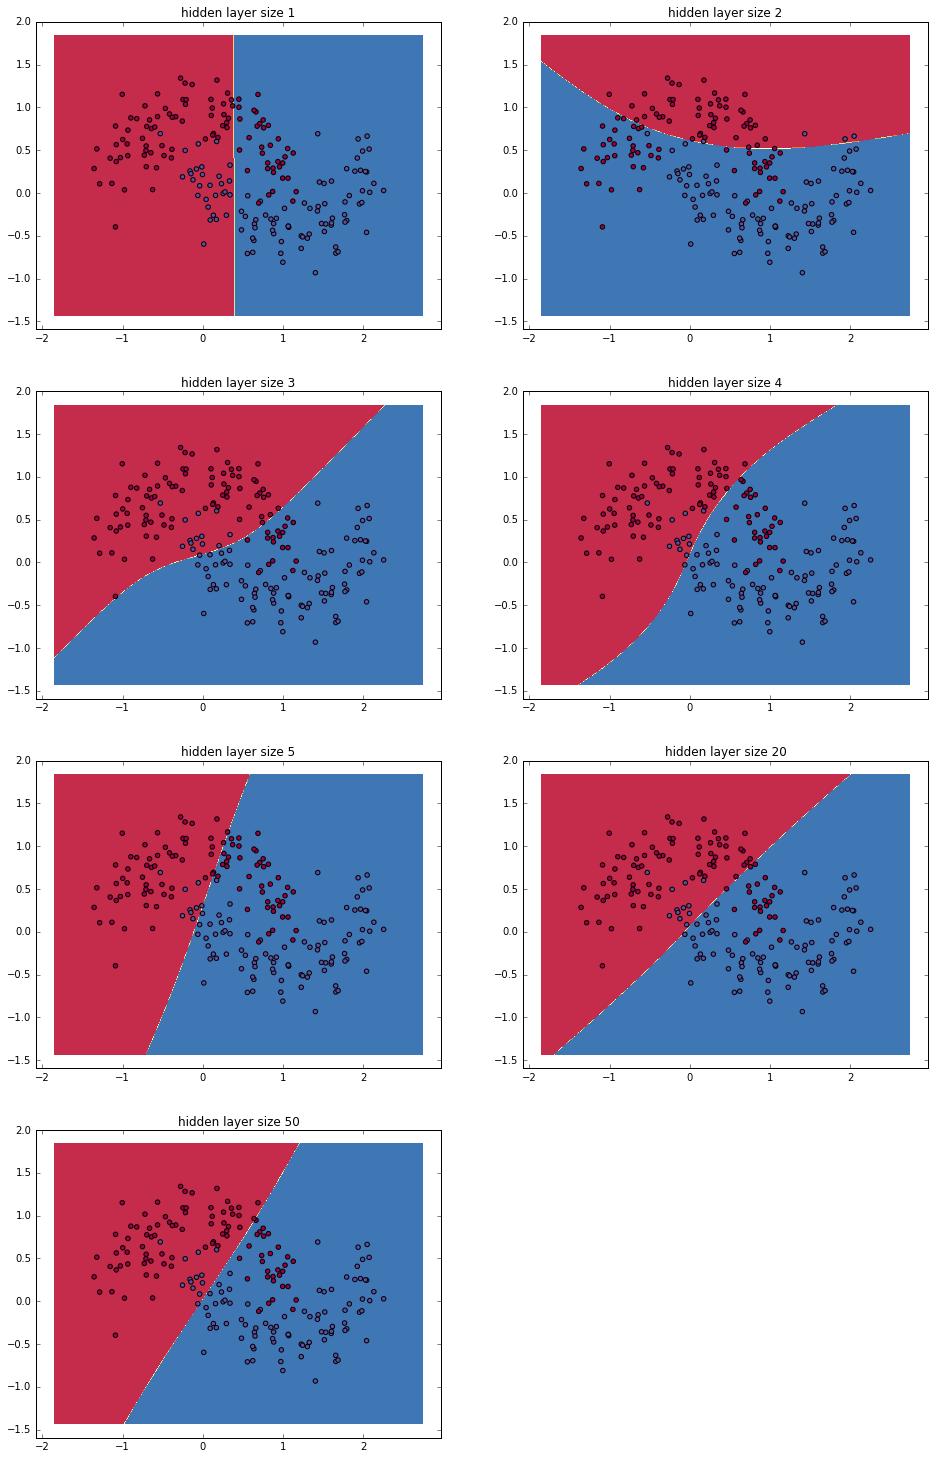

In [10]:
plt.figure(figsize=(16,32))
hidden_layer_dimensions=[1,2,3,4,5,20,50]
for i,nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5,2,i+1)
    plt.title('hidden layer size %d'% nn_hdim)
    model=build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model,x))